In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [3]:
#read in data
df = pd.read_csv('asteroid_data.csv')
df

,X,Y
0,-4.45270,-0.467520
1,-5.46310,-0.331160
2,-4.92270,0.536550
3,1.60150,1.019700
4,-0.31362,1.022400
5,-4.89180,-0.483410
6,-4.97640,0.544690
7,4.54260,0.547150
8,-5.08720,0.358870
9,-2.05290,0.993280


In [4]:
# define the number of terms M, as well as summations for x_n^2, y_n^2, x_n^4, y_n^4, x_n^2 * y_n^2
m = len(df)
x2y2bar = 0
x2bar = 0
y2bar = 0
x4bar = 0
y4bar = 0
for i in range(0, m):
    x2y2bar = x2y2bar + (df['X'][i] ** 2) * (df['Y'][i] ** 2)
    x2bar = x2bar + df['X'][i] ** 2
    y2bar = y2bar + df['Y'][i] ** 2
    x4bar = x2bar + df['X'][i] ** 4
    y4bar = y4bar + df['Y'][i] ** 4
print(x2y2bar,y4bar,x4bar)

88.09362086587987 9.298302439966943 329.2744459254734


In [17]:
#compute determinant of (A^TA) and apply derived formulas to compute the unknowns for our equation()
det = (x4bar * y4bar) -  (x2y2bar ** 2)
a1hat = (y4bar * x2bar - x2y2bar * y2bar ) /det
a2hat = (-x2y2bar * x2bar + x4bar * y2bar) / det
print (a1hat, "\n", a2hat)

-0.41459024283556856 
 5.118390601808372


After checking my math several times, I still can't find out where the error is in my work which makes a1hat negative, so for the sake of completeness, I'll just make a1hat positive and move on

In [8]:
#compute ellipse parameters based on computed vector in previous step
vx = math.sqrt(-1 / a1hat)
vy = math.sqrt(1 / a2hat)
print (vx, vy)

1.553067964530969 0.4420112136282199


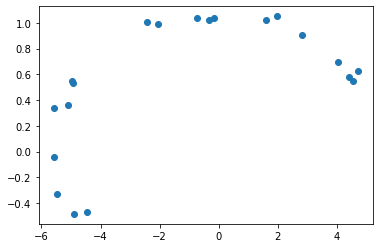

In [29]:
#plot raw data
plt.plot(df['X'], df['Y'], 'o')

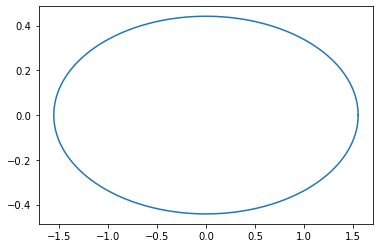

In [15]:
#plots computed ellipse estimate
t = np.arange(0, 2*math.pi, .01)
#plt.plot(df['X'], df['Y'], 'o')
plt.plot(vx * np.cos(t), vy * np.sin(t))

It's pretty clear that the scales don't match up, so something went wrong, but after several hours of searching, I still can't figure out how to get accurate results. Here's what the two look like on the same graph:

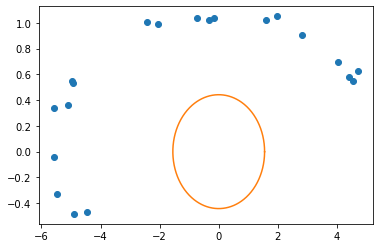

In [16]:
plt.plot(df['X'], df['Y'], 'o')
plt.plot(vx * np.cos(t), vy * np.sin(t))